MLI Module 4 Assignment 1

see Module 4 - Lecture 17 - Regularisation and Optimisation.pdf on L1 and L2

In [1]:
import pandas as pd # data frames
import numpy as np

In [83]:
# read data
df = pd.read_csv("MLI Data Assignment 1.csv", index_col='year')
df.head()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol,return
year,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,6.979253,-0.025060,0.825243,-1.762136,-0.327184,119.490500,1.439205,5.258117,0.639888,3.365
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,0.366087,0.145088,0.460968,0.430453,0.114718,2.108288,1.017459,2.859285,1.140449,3.261
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.shape

(43870, 10)

In [66]:
df.describe()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol,return
count,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000
mean,2.058294,-5.668109,-2.177798,-19.911232,-0.887694,29.342611,1.367895,0.274550,5.665615,1.203678
std,20.528246,606.173803,185.189412,657.400766,50.153790,472.762696,16.134272,1.484090,141.266594,26.252376
min,0.000008,-88875.137010,-25967.974360,-55576.000000,-6313.000000,0.000020,-1967.526223,-2.533056,0.019629,-1.000000
25%,0.076733,-0.117017,0.206121,-0.521662,-0.051757,1.051082,0.904552,-0.453150,0.377869,-0.343500
50%,0.305719,0.025415,0.438835,0.017834,0.038708,3.366596,1.519760,-0.032473,0.596584,-0.021000
75%,1.119911,0.070114,0.665494,0.198595,0.096758,10.878026,2.385868,0.681469,0.991382,0.344000
max,2204.000000,7468.650000,0.999723,2.073072,6.475407,45718.500000,50.941268,91.532453,9898.965329,1765.906000


In [84]:
# remove all null values if any?
df.isnull().sum()[df.isnull().sum() != 0]

qr        21935
roe       21935
wcoa      21935
reoa      21935
eoa       21935
edr       21935
dd        21935
sr        21935
vol       21935
return    21935
dtype: int64

In [85]:
# drop all rows with NaN/null values
df = df.dropna(axis=0)
# check again
print(df.isnull().sum()[df.isnull().sum() != 0])
print(df.shape)

Series([], dtype: int64)
(21935, 10)


In [86]:
df.describe()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol,return
count,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000,21935.000000
mean,2.058294,-5.668109,-2.177798,-19.911232,-0.887694,29.342611,1.367895,0.274550,5.665615,1.203678
std,20.528246,606.173803,185.189412,657.400766,50.153790,472.762696,16.134272,1.484090,141.266594,26.252376
min,0.000008,-88875.137010,-25967.974360,-55576.000000,-6313.000000,0.000020,-1967.526223,-2.533056,0.019629,-1.000000
25%,0.076733,-0.117017,0.206121,-0.521662,-0.051757,1.051082,0.904552,-0.453150,0.377869,-0.343500
50%,0.305719,0.025415,0.438835,0.017834,0.038708,3.366596,1.519760,-0.032473,0.596584,-0.021000
75%,1.119911,0.070114,0.665494,0.198595,0.096758,10.878026,2.385868,0.681469,0.991382,0.344000
max,2204.000000,7468.650000,0.999723,2.073072,6.475407,45718.500000,50.941268,91.532453,9898.965329,1765.906000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 21935 entries, 1985.0 to 2017.0
Data columns (total 10 columns):
qr        21935 non-null float64
roe       21935 non-null float64
wcoa      21935 non-null float64
reoa      21935 non-null float64
eoa       21935 non-null float64
edr       21935 non-null float64
dd        21935 non-null float64
sr        21935 non-null float64
vol       21935 non-null float64
return    21935 non-null float64
dtypes: float64(10)
memory usage: 1.8 MB


In [87]:
df.index = df.index.astype(int)

In [88]:
# defining vars
input_vars = ["qr", "roe", "wcoa", "reoa", "eoa", "edr", "dd", "sr", "vol"]
target = ["return"]

In [89]:
# have a look at the 9 independent variables
X = df.drop(labels=target, axis=1)
X.head()

,qr,roe,wcoa,reoa,eoa,edr,dd,sr,vol
year,,,,,,,,,
1985,6.979253,-0.025060,0.825243,-1.762136,-0.327184,119.490500,1.439205,5.258117,0.639888
1985,0.366087,0.145088,0.460968,0.430453,0.114718,2.108288,1.017459,2.859285,1.140449
1985,0.167489,0.009445,0.494797,0.185266,0.138259,15.030330,0.171042,0.477294,4.755013
1985,0.049812,0.016664,0.321690,0.114644,0.105986,10.288281,1.109971,2.946292,0.678819
1985,0.926230,0.064134,0.689753,0.170997,0.145380,11.486287,1.360837,2.831762,0.679110


In [90]:
# check out the dependent variable
y = df.drop(labels=input_vars, axis=1)
y.head()

,return
year,
1985,3.365
1985,3.261
1985,2.270
1985,2.000
1985,1.923


In [94]:
import time
from sklearn.ensemble import IsolationForest
start = time.time()
    
If = IsolationForest()
If.fit(X) 
y_pred = If.predict(X)

np.count_nonzero(y_pred == -1)

C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


2194

In [78]:
hist = np.histogram(y_pred, bins=2)
print(f"#Outliers: {hist[0][0]}\n#Inliers: {hist[0][1]}")

#Outliers: 2194
#Inliers: 19741


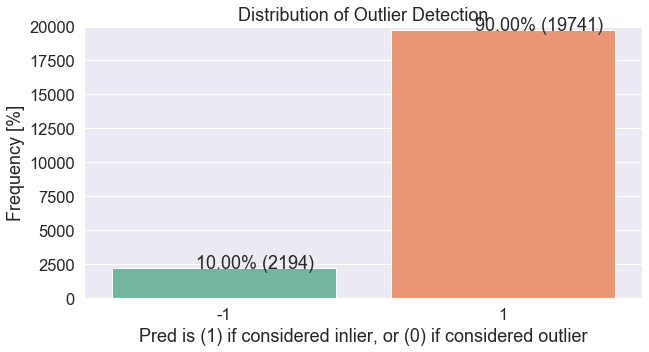

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x = y_pred ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=round(y_pred.shape[0], -len(str(y_pred.shape[0]))+1))
for p in ax.patches:
    ax.annotate('{:.2f}% ({})'.format(100*p.get_height()/len(y_pred), p.get_height()), 
                (p.get_x()+ 0.3, p.get_height()+10))

plt.title('Distribution of Outlier Detection')
plt.xlabel('Pred is (1) if considered inlier, or (-1) if considered outlier')
plt.ylabel('Frequency [%]')
plt.show()

In [80]:
# remove outliers from data
df_wo_outliers = df[y_pred == 1]
df_wo_outliers.shape

(19741, 10)

In [109]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

num_linspace = 25
models_and_parameters = {
    'linReg': (LinearRegression(), 
              {}),
    'lasso': (Lasso(), 
              {'alpha': np.linspace(0.00001, 0.8, num=num_linspace)}),
    'ridge': (Ridge(), 
              {'alpha': np.linspace(0.00001, 0.8, num=num_linspace)}),
    'elnet': (ElasticNet(), 
              {'alpha': np.linspace(0.00001, 0.99999, num=10),  # Constant that multiplies the penalty terms
               'l1_ratio': np.linspace(0.0001, 0.9999, num=num_linspace)}) # The ElasticNet mixing parameter, with 0 < l1_ratio < 1, the penalty is a combination of L1 and L2
}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import metrics
from time import time


#######################################
# configuration
REPEAT = 5
SEED = None  # will ensure different results on each iteration
K_FOLD_NUM = 5
REFIT_METRIC = 'MSE'
#######################################

mse_scorer = metrics.make_scorer(mean_squared_error, greater_is_better=False)

# use nested cross-validation for grid search and validation
# creates 5 folds for estimating generalization error, repeat 
outer_folds = RepeatedKFold(n_repeats=REPEAT, n_splits=K_FOLD_NUM, random_state=SEED)

# when we train on a certain fold, we use a second cross-validation
# split in order to choose hyperparameters
inner_folds = KFold(n_splits=K_FOLD_NUM, random_state=SEED, shuffle=True)

i, z, innercv_results, inner_best_model = 0, 0, {}, {}
df_outer_results = pd.DataFrame(index=[0], columns=["Model", "Time", "MSE"])

X_arr, y_arr = X.values, y.values

# outer loop
for (out_train, out_test) in outer_folds.split(X_arr, y_arr):
    print(f"Repetition {int(i / K_FOLD_NUM) + 1} Fold {i % K_FOLD_NUM + 1}")
    i += 1  # iteration
    # separation: train, test
    Xtrain, Xtest = X_arr[out_train], X_arr[out_test]
    ytrain, y_test = y_arr[out_train], y_arr[out_test]
    
    # scale variables
    scaler_x = StandardScaler().fit(Xtrain)
    Xtrain = scaler_x.transform(Xtrain)
    Xtest = scaler_x.transform(Xtest)
    
    # inner loop -- all models
    fold_id = "fold_" + str(i)
    innercv_results[fold_id] = {}
    inner_best_model[fold_id] = {}
    start, end = [], []
    
    for model_name, (model, params) in models_and_parameters.items():
        start.append(time())
        print("\t", model_name)
        innercv_results[fold_id][model_name] = GridSearchCV(estimator=model, 
                                                            param_grid=params, 
                                                            scoring=mse_scorer, 
                                                            iid=False,
                                                            cv=inner_folds, 
                                                            refit=REFIT_METRIC)    
        innercv_results[fold_id][model_name].fit(Xtrain, ytrain.ravel())
        inner_best_model[fold_id][model_name] = innercv_results[fold_id][model_name].best_estimator_
        end.append(time())        
    
    # outer loop prediction    
    for v, (model_name, (model, _)) in enumerate(models_and_parameters.items()):
        # prediction
        y_test_pred = inner_best_model[fold_id][model_name].predict(Xtest)
        df_outer_results.loc[z, "Model"] = model_name
        df_outer_results.loc[z, "Time"] = end[v] - start[v]
        
        # compute performance metrics
        df_outer_results.loc[z, 'MSE'] = mean_squared_error(y_test, y_test_pred)
        z += 1        

# final organisation
df_outer_results[['MSE'] + ["Time"]] = df_outer_results[['MSE'] + ["Time"]].astype(float)
print("done.")

Repetition 1 Fold 1
	 linReg
	 lasso
	 ridge
	 elnet


C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207079.7634588722, tolerance: 1439.553145408388
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 991523.1216398329, tolerance: 1434.3988306989295
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3399.587908978574, tolerance: 943.3409740799126
  positive)


Repetition 1 Fold 2
	 linReg
	 lasso
	 ridge
	 elnet


C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278358.25643907115, tolerance: 1385.9120035969445
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1584468.1713402139, tolerance: 915.0852611930436
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1976348.1965005174, tolerance: 1332.082067900549
  positive)


Repetition 1 Fold 3
	 linReg
	 lasso
	 ridge
	 elnet
Repetition 1 Fold 4
	 linReg
	 lasso
	 ridge
	 elnet


C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1350678.4824133147, tolerance: 879.0447856627958
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3370490.493973141, tolerance: 781.9464364545571
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43544.7556308331, tolerance: 781.9464364545571
  positive)
C:\dev\python\Anaconda3\envs\mli3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the

> Questions to Answer:

1) Describe how the results change when you add each of the regularization techniques


2) Which variables change with L1, L2 and Elastic Net regressions and why?


3) How did you determine to set the p parameter for L1 and L2 regressions and the λ parameters for the Elastic Net?


4) What are the advantages and disadvantages of each of the regularization techniques and how are they reflected in your results?

